In [ ]:
# Import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Load the data
df = pd.read_csv('/content/Final Data.csv')
# df = df.sample(frac=1,random_state=0)
# df

In [ ]:
# considering all the numerical columns
df1=df.iloc[:,5:]
df1.head()

,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,chroma_stft_median_0,chroma_stft_kurtosis_0,chroma_stft_kew_1,chroma_stft_min_1,chroma_stft_max_1,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
0,0.091806,0.049545,1.0,0.306971,0.570429,0.556123,-1.389693,0.344998,0.035745,1.0,...,0.007217,-0.000351,-0.410349,-0.604349,0.022585,0.102132,0.017701,0.072071,0.074626,0.012681
1,1.025965,0.007265,1.0,0.274179,0.350277,0.265414,0.140231,0.379772,0.004221,1.0,...,-0.011851,-0.010293,0.099909,-0.233246,0.057460,0.229705,0.035304,0.147578,0.157302,-0.281870
2,1.395750,0.000648,1.0,0.307888,0.236975,0.087020,0.739644,1.646942,0.000456,1.0,...,0.001545,-0.009260,0.360879,0.742759,0.023492,0.178957,0.032571,0.077563,0.066463,-0.180427
3,0.926616,0.003467,1.0,0.242382,0.301311,0.262466,0.285644,0.843115,0.003586,1.0,...,-0.014834,-0.023444,0.456362,0.524002,0.051111,0.277596,0.045581,0.147997,0.142472,-0.344706
4,0.311976,0.037900,1.0,0.336300,0.517165,0.438171,-1.429111,0.892591,0.045833,1.0,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578


In [ ]:
# removing the outliers with the help of iqr method
feature = df1 # one or more.
for cols in feature:
    Q1 = df1[cols].quantile(0.25)
    Q3 = df1[cols].quantile(0.75)
    IQR = Q3 - Q1
    dff = df1[((df1[cols] < (Q1 - 1.5 * IQR)) |(df1[cols] > (Q3 + 1.5 * IQR)))]
f=dff.index
new_df = df.iloc[f]
new_df.head()

,Artist,Title,Label,Path,choruspath,chroma_stft_kew_0,chroma_stft_min_0,chroma_stft_max_0,chroma_stft_std_0,chroma_stft_mean_0,...,tonnetz_mean_5,tonnetz_median_5,tonnetz_kurtosis_5,zero_crossing_rate_kew_0,zero_crossing_rate_min_0,zero_crossing_rate_max_0,zero_crossing_rate_std_0,zero_crossing_rate_mean_0,zero_crossing_rate_median_0,zero_crossing_rate_kurtosis_0
4,BTS,Butter,1,Songs/BTS (방탄소년단) 'Butter' Official MV.mp3,Songs/RepeatedPopularChorus/BTS (방탄소년단) 'Butte...,0.311976,0.037900,1.0,0.336300,0.517165,...,0.005743,0.005232,-0.153372,2.700198,0.046848,0.235737,0.030815,0.097298,0.090204,7.939578
6,Ariana Grande,Positions,1,Songs/Ariana Grande - positions (official vide...,Songs/RepeatedPopularChorus/Ariana Grande - po...,0.625499,0.004906,1.0,0.349639,0.401012,...,-0.010469,-0.013594,0.965718,1.482353,0.046122,0.253288,0.031441,0.129609,0.122585,3.700731
10,Billie Eilish,Therefore I Am,1,Songs/Billie Eilish - Therefore I Am (Official...,Songs/RepeatedPopularChorus/Billie Eilish - Th...,1.162719,0.002263,1.0,0.287140,0.314937,...,-0.005514,-0.008329,1.982250,2.836909,0.019819,0.239637,0.043763,0.057317,0.042630,7.582306
27,Billie Eilish,Everything I Wanted,1,Songs/Billie Eilish - everything i wanted.mp3,Songs/RepeatedPopularChorus/Billie Eilish - ev...,2.054160,0.000891,1.0,0.214297,0.193929,...,-0.045801,-0.068198,1.039385,2.654018,0.017188,0.110884,0.020011,0.033907,0.029252,6.562822
34,Travis Scott,HIGHEST IN THE ROOM,1,Songs/Travis Scott - HIGHEST IN THE ROOM (Offi...,Songs/RepeatedPopularChorus/Travis Scott - HIG...,-0.262656,0.013173,1.0,0.248823,0.613265,...,0.001246,0.006099,0.763980,2.129763,0.004444,0.163265,0.033201,0.043951,0.033469,4.543320


In [ ]:
# # feature columns
x = new_df.iloc[:,5:]

# target column
y = new_df['Label'] 

In [ ]:
# Balance Imbalanced dataset
from imblearn.over_sampling import RandomOverSampler
from imblearn.combine import SMOTETomek

#os =  RandomOverSampler(sampling_strategy=1)
os =  SMOTETomek(sampling_strategy=1)

X_res, y_res = os.fit_resample(x, y)
X_res.shape,y_res.shape

((52, 518), (52,))

In [ ]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({1: 28, 0: 13})
Resampled dataset shape Counter({1: 26, 0: 26})


In [ ]:
# this function detects the columns that are highly correlated 

def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = dataset.corr() 
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
        
    return col_corr

In [ ]:
corr_features = correlation(X_res, 0.9) # considering 90% and above as highly correlated
len(set(corr_features))

111

In [ ]:
# dropping the duplicates columns
x_res = X_res.drop(corr_features,axis=1)

In [ ]:
from sklearn.feature_selection import mutual_info_classif
# determine the mutual information
mutual_info = mutual_info_classif(X_res, y_res)
mutual_info

array([1.88826671e-01, 5.20475313e-02, 0.00000000e+00, 8.97575262e-03,
       9.42085754e-02, 7.90223727e-02, 0.00000000e+00, 6.27504501e-02,
       0.00000000e+00, 4.98018069e-02, 1.29724715e-01, 0.00000000e+00,
       0.00000000e+00, 1.32340441e-01, 0.00000000e+00, 1.13821121e-01,
       1.08760210e-01, 3.92463901e-02, 0.00000000e+00, 3.74508585e-03,
       1.45606592e-02, 8.89487711e-02, 4.76070999e-02, 0.00000000e+00,
       2.65290896e-01, 1.48053342e-01, 1.02091878e-01, 2.08386065e-01,
       5.75940147e-02, 1.58249662e-01, 0.00000000e+00, 0.00000000e+00,
       3.89909851e-03, 0.00000000e+00, 0.00000000e+00, 2.43277813e-01,
       2.53124074e-02, 0.00000000e+00, 0.00000000e+00, 1.16534380e-01,
       2.02810657e-01, 1.30970103e-01, 8.97605127e-02, 1.37775639e-01,
       0.00000000e+00, 1.20210004e-01, 1.24253317e-01, 9.78029511e-02,
       1.88800727e-01, 0.00000000e+00, 5.16187933e-02, 1.38516460e-02,
       3.65489826e-03, 3.35097656e-02, 0.00000000e+00, 2.67852401e-02,
      

In [ ]:
# Highest feature importance to Lowest
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_res.columns
mutual_info.sort_values(ascending=False)

chroma_cqt_kew_3                0.350794
spectral_contrast_kurtosis_0    0.316448
chroma_cens_mean_5              0.308961
chroma_cqt_mean_7               0.278323
chroma_stft_kew_8               0.272868
                                  ...   
mfcc_max_14                     0.000000
chroma_cqt_max_10               0.000000
mfcc_min_15                     0.000000
chroma_stft_min_1               0.000000
mfcc_std_4                      0.000000
Length: 518, dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest
# Select the top 25 important features
sel_five_cols = SelectKBest(mutual_info_classif, k=25)
sel_five_cols.fit(X_res, y_res)
best=X_res.columns[sel_five_cols.get_support()]
print(best)

Index(['chroma_stft_std_3', 'chroma_stft_kew_5', 'chroma_stft_kew_8',
       'chroma_stft_mean_8', 'chroma_stft_median_8', 'chroma_stft_kurtosis_8',
       'chroma_cqt_kew_0', 'chroma_cqt_kew_3', 'chroma_cqt_median_6',
       'chroma_cqt_mean_7', 'chroma_cens_mean_5', 'chroma_cens_median_7',
       'chroma_cens_mean_8', 'chroma_cens_kew_10', 'chroma_cens_kurtosis_10',
       'mfcc_mean_2', 'mfcc_kurtosis_12', 'mfcc_min_18',
       'spectral_centroid_kew_0', 'spectral_bandwidth_mean_0',
       'spectral_contrast_kew_0', 'spectral_contrast_kurtosis_0',
       'spectral_contrast_min_2', 'tonnetz_kew_0', 'tonnetz_std_1'],
      dtype='object')


In [ ]:
be = list(best)
be

['chroma_stft_std_3',
 'chroma_stft_kew_5',
 'chroma_stft_kew_8',
 'chroma_stft_mean_8',
 'chroma_stft_median_8',
 'chroma_stft_kurtosis_8',
 'chroma_cqt_kew_0',
 'chroma_cqt_kew_3',
 'chroma_cqt_median_6',
 'chroma_cqt_mean_7',
 'chroma_cens_mean_5',
 'chroma_cens_median_7',
 'chroma_cens_mean_8',
 'chroma_cens_kew_10',
 'chroma_cens_kurtosis_10',
 'mfcc_mean_2',
 'mfcc_kurtosis_12',
 'mfcc_min_18',
 'spectral_centroid_kew_0',
 'spectral_bandwidth_mean_0',
 'spectral_contrast_kew_0',
 'spectral_contrast_kurtosis_0',
 'spectral_contrast_min_2',
 'tonnetz_kew_0',
 'tonnetz_std_1']

In [ ]:
x_re = X_res[be]
#x_test = X_test[be]

x_re

,chroma_stft_std_3,chroma_stft_kew_5,chroma_stft_kew_8,chroma_stft_mean_8,chroma_stft_median_8,chroma_stft_kurtosis_8,chroma_cqt_kew_0,chroma_cqt_kew_3,chroma_cqt_median_6,chroma_cqt_mean_7,...,mfcc_mean_2,mfcc_kurtosis_12,mfcc_min_18,spectral_centroid_kew_0,spectral_bandwidth_mean_0,spectral_contrast_kew_0,spectral_contrast_kurtosis_0,spectral_contrast_min_2,tonnetz_kew_0,tonnetz_std_1
0,0.307601,0.688423,0.342242,0.497974,0.450946,-1.219764,0.679267,0.286978,0.358846,0.300379,...,7.402798,1.537567,-24.342270,1.319304,2796.126022,1.895395,7.737479,7.491907,-0.220117,0.073762
1,0.273791,0.875132,1.000121,0.328706,0.266789,0.344607,-0.099980,0.332951,0.357443,0.545035,...,23.409370,0.248962,-19.260872,0.737735,3204.563709,1.324917,3.179533,7.758160,1.003904,0.068183
2,0.287141,0.399777,0.425311,0.387549,0.348080,-0.991377,0.440905,0.386363,0.665309,0.682740,...,18.784061,-0.385325,-24.464256,2.134979,2581.929088,1.274027,6.321488,7.226860,0.527305,0.057763
3,0.224794,0.878296,0.722315,0.374918,0.183986,-1.155732,2.486534,2.013085,0.154056,0.169754,...,47.184429,-0.110292,-28.062132,3.562558,1296.500536,0.592067,1.703356,10.838433,0.258404,0.149774
4,0.219479,-0.598148,0.153768,0.491926,0.494636,0.047825,0.526516,0.489466,0.206900,0.240447,...,28.053030,0.498900,-23.064198,1.225052,2702.822396,0.225497,0.489644,7.819248,1.088262,0.079123
5,0.299156,0.733583,0.316898,0.422558,0.381149,-1.181073,0.252038,0.700008,0.438434,0.659741,...,34.243687,0.056340,-24.828451,1.603685,2142.991328,0.706360,1.883711,7.517958,-0.316385,0.072511
6,0.224265,-0.867108,-0.879345,0.725604,0.874800,-0.632131,1.116257,0.831665,1.000000,0.366278,...,23.628414,0.014469,-13.749360,1.359895,1714.021648,0.517544,0.519618,8.654085,-0.464420,0.149726
7,0.296700,0.379426,0.221996,0.548178,0.516429,-1.214635,0.673465,0.369913,0.652435,0.883926,...,17.976683,0.254634,-25.975109,2.525069,1649.003580,0.663630,1.757013,6.324585,0.780459,0.101058
8,0.281216,0.520033,0.670909,0.440039,0.400469,-0.272352,1.046057,0.836122,0.481949,0.367727,...,-22.596888,0.221686,-15.646051,0.183072,2383.062751,0.954102,2.856174,6.470442,-0.700595,0.152766
9,0.230029,-0.824987,0.589176,0.521620,0.510280,0.854032,2.054957,0.246465,0.114662,0.141378,...,7.504445,-0.169173,-13.657955,0.648501,2367.848734,1.437008,4.868819,10.389746,0.862946,0.110066


In [ ]:
# from sklearn.ensemble import ExtraTreesClassifier
# import matplotlib.pyplot as plt
# model = ExtraTreesClassifier()
# model.fit(x,y)

ExtraTreesClassifier()

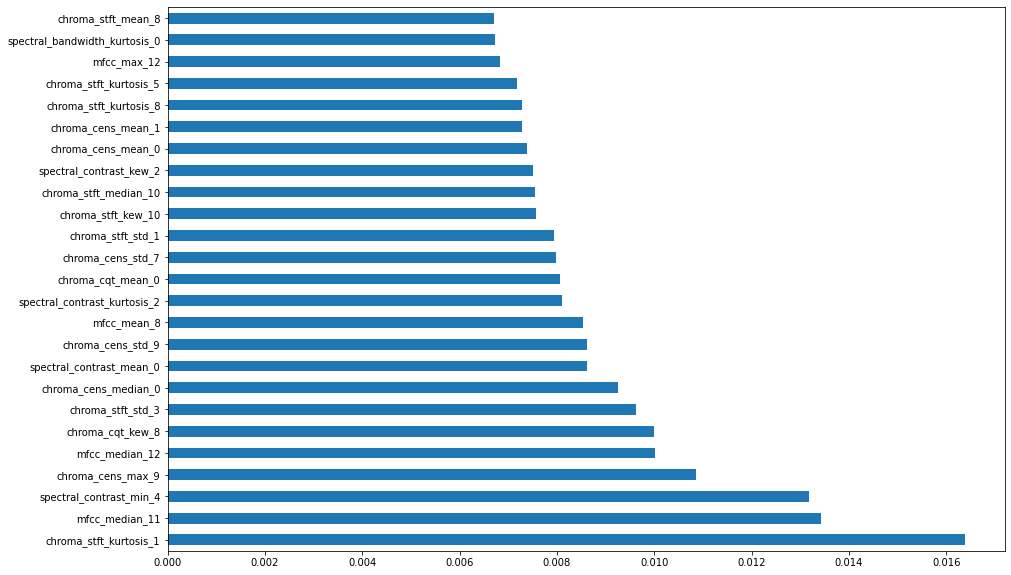

In [ ]:
# plt.figure(figsize=(15,10))
# feat_importances = pd.Series(model.feature_importances_, index=x.columns)
# feat_importances.nlargest(25).plot(kind='barh')
# be = feat_importances.nlargest(25)
# plt.show()

In [ ]:
# best=list(be.index)
# best

['chroma_stft_kurtosis_1',
 'mfcc_median_11',
 'spectral_contrast_min_4',
 'chroma_cens_max_9',
 'mfcc_median_12',
 'chroma_cqt_kew_8',
 'chroma_stft_std_3',
 'chroma_cens_median_0',
 'spectral_contrast_mean_0',
 'chroma_cens_std_9',
 'mfcc_mean_8',
 'spectral_contrast_kurtosis_2',
 'chroma_cqt_mean_0',
 'chroma_cens_std_7',
 'chroma_stft_std_1',
 'chroma_stft_kew_10',
 'chroma_stft_median_10',
 'spectral_contrast_kew_2',
 'chroma_cens_mean_0',
 'chroma_cens_mean_1',
 'chroma_stft_kurtosis_8',
 'chroma_stft_kurtosis_5',
 'mfcc_max_12',
 'spectral_bandwidth_kurtosis_0',
 'chroma_stft_mean_8']

In [ ]:
# x = x[best]
# x

,chroma_stft_kurtosis_1,mfcc_median_11,spectral_contrast_min_4,chroma_cens_max_9,mfcc_median_12,chroma_cqt_kew_8,chroma_stft_std_3,chroma_cens_median_0,spectral_contrast_mean_0,chroma_cens_std_9,...,chroma_stft_kew_10,chroma_stft_median_10,spectral_contrast_kew_2,chroma_cens_mean_0,chroma_cens_mean_1,chroma_stft_kurtosis_8,chroma_stft_kurtosis_5,mfcc_max_12,spectral_bandwidth_kurtosis_0,chroma_stft_mean_8
4,-0.003334,5.723991,10.514329,0.326983,1.350161,0.226403,0.307601,0.292327,21.568014,0.033206,...,0.480594,0.371701,0.277018,0.314146,0.416596,-1.219764,-0.803396,25.761963,1.040459,0.497974
6,-0.444152,4.258860,10.045580,0.530024,-2.300500,0.503580,0.273791,0.293212,18.511539,0.095679,...,0.979344,0.279995,0.321917,0.305719,0.316640,0.344607,-0.547770,25.920376,-0.026927,0.328706
10,-1.237361,1.097996,10.563236,0.584029,-4.950949,0.386178,0.287141,0.198762,22.898629,0.083990,...,0.580628,0.295301,0.435291,0.196006,0.228032,-0.991377,-1.186758,14.575922,0.551288,0.387549
27,-0.947630,-5.705751,10.727909,0.722094,-9.090014,0.693469,0.224794,0.061389,27.434212,0.176671,...,1.958595,0.082999,0.216232,0.102015,0.351629,-1.155732,-0.315365,6.190770,-0.962299,0.374918
34,-0.078611,7.544337,10.919666,0.308394,6.194431,0.446338,0.219479,0.233869,21.566324,0.063190,...,0.003735,0.594578,0.534474,0.263206,0.343914,0.047825,-0.925720,44.413704,-0.287446,0.491926
35,-1.064713,4.228055,10.169608,0.381855,-1.327486,-0.011567,0.299156,0.262209,21.382686,0.060319,...,0.279300,0.447802,0.646362,0.307656,0.226165,-1.181073,-0.553264,25.742798,-0.504772,0.422558
49,-1.091500,9.341040,10.392859,0.453504,2.098705,0.754295,0.224265,0.175458,21.336033,0.090830,...,-0.436643,0.535166,0.880745,0.191621,0.341190,-0.632131,-0.408924,21.440842,-0.587634,0.725604
66,-0.582986,4.671277,9.306116,0.317023,1.089396,-0.459556,0.296700,0.196963,21.882722,0.055707,...,-0.196520,0.586686,0.254515,0.230537,0.293210,-1.214635,-0.886191,30.159370,-0.111400,0.548178
96,-1.275377,8.748087,10.352251,0.431832,2.904107,1.102524,0.281216,0.237366,19.684086,0.073186,...,0.125729,0.545681,0.355044,0.242653,0.252208,-0.272352,-0.661604,25.953014,0.431407,0.440039
99,0.087564,13.893175,10.961171,0.233688,6.973990,2.906276,0.230029,0.044254,23.182840,0.064099,...,-0.273206,0.612758,0.446970,0.115243,0.261224,0.854032,-0.459331,28.501255,-0.783972,0.521620


In [ ]:
# Splitting the data into train and test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_re,y_res,test_size=0.2,random_state=0)

print(" Training data: ",X_train.shape)
print(" Testing data:  ",X_test.shape)

 Training data:  (41, 25)
 Testing data:   (11, 25)


# **Random** **Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier(n_estimators=400).fit(X_train,y_train)
prediction=rf_classifier.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(y_test,prediction))
print(accuracy_score(y_test,prediction))
print(classification_report(y_test,prediction))

[[7 0]
 [0 4]]
1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      1.00      1.00         4

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



In [ ]:
import pickle
# Saving model to disk
pickle.dump(rf_classifier, open('rfmodel2.pkl','wb'))

In [ ]:
### Manual Hyperparameter Tuning
model=RandomForestClassifier(n_estimators=500,criterion='entropy',
                             max_features='sqrt',min_samples_leaf=10).fit(X_train,y_train)
predictions=model.predict(X_test)
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))
print(classification_report(y_test,predictions))

[[6 1]
 [0 4]]
0.9090909090909091
              precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.91        11
weighted avg       0.93      0.91      0.91        11



In [ ]:
import pickle
# Saving model to disk
pickle.dump(model, open('rfmodel.pkl','wb'))

# **Hyperparameter Tuning With RandomizedSearchCV**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = np.arange(100,300,10)
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2']
# Maximum number of levels in tree
max_depth = [None,3,5,10]
# Minimum number of samples required to split a node
min_samples_split = np.arange(2,20,2)
max_leaf_nodes = [2,5,10]
# Minimum number of samples required at each leaf node
min_samples_leaf = np.arange(1,20,2)
#max_samples : [100]
#max_samples_split = np.arange(2,20,2)
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               #'max_samples': max_samples,
               'max_leaf_nodes': [2,5,10], 
              'criterion':['entropy','gini']}
print(random_grid)

{'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290]), 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [None, 3, 5, 10], 'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]), 'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]), 'max_leaf_nodes': [2, 5, 10], 'criterion': ['entropy', 'gini']}


In [ ]:
rf=RandomForestClassifier()
rf_randomcv=RandomizedSearchCV(estimator=rf,param_distributions=random_grid,n_iter=100,cv=5,verbose=2,
                               n_jobs=-1)
### fit the randomized model
rf_randomcv.fit(X_train,y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'criterion': ['entropy', 'gini'],
                                        'max_depth': [None, 3, 5, 10],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'max_leaf_nodes': [2, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220,
       230, 240, 250, 260, 270, 280, 290])},
                   verbose=2)

In [ ]:
best_random_grid=rf_randomcv.best_estimator_
best_random_grid

RandomForestClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=2,
                       min_samples_leaf=9, min_samples_split=6,
                       n_estimators=230)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred=best_random_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[6 1]
 [0 4]]
Accuracy Score 0.9090909090909091
Classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.91        11
weighted avg       0.93      0.91      0.91        11



In [ ]:
import pickle
# Saving model to disk
pickle.dump(rf_randomcv, open('rfmodel.pkl','wb'))

In [ ]:
# Select best parameters
rf_randomcv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'sqrt',
 'max_leaf_nodes': 2,
 'min_samples_leaf': 9,
 'min_samples_split': 6,
 'n_estimators': 230}

# **GridSearchCV Hyperparameter** **Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'criterion': [rf_randomcv.best_params_['criterion']],
    'max_depth': [rf_randomcv.best_params_['max_depth']],
    'max_features': [rf_randomcv.best_params_['max_features']],
    'max_leaf_nodes': [rf_randomcv.best_params_['max_leaf_nodes'],
                       rf_randomcv.best_params_['max_leaf_nodes']+1,
                       rf_randomcv.best_params_['max_leaf_nodes']+2],
    'min_samples_leaf': [rf_randomcv.best_params_['min_samples_leaf'], 
                         rf_randomcv.best_params_['min_samples_leaf']+1, 
                         rf_randomcv.best_params_['min_samples_leaf'] + 2],
    'min_samples_split': [rf_randomcv.best_params_['min_samples_split'] - 1,
                          rf_randomcv.best_params_['min_samples_split'] - 2,
                          rf_randomcv.best_params_['min_samples_split'], 
                          rf_randomcv.best_params_['min_samples_split'] +1,
                          rf_randomcv.best_params_['min_samples_split'] + 2],
    'n_estimators': [rf_randomcv.best_params_['n_estimators'] - 200, rf_randomcv.best_params_['n_estimators'] + 10, 
                     rf_randomcv.best_params_['n_estimators'], 
                     rf_randomcv.best_params_['n_estimators'] + 100, rf_randomcv.best_params_['n_estimators'] + 20]
}

print(param_grid)

{'criterion': ['gini'], 'max_depth': [10], 'max_features': ['sqrt'], 'max_leaf_nodes': [2, 3, 4], 'min_samples_leaf': [9, 10, 11], 'min_samples_split': [5, 4, 6, 7, 8], 'n_estimators': [30, 240, 230, 330, 250]}


In [ ]:
#### Fit the grid_search to the data
rf=RandomForestClassifier()
grid_search=GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,n_jobs=-1,verbose=2)
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 225 candidates, totalling 1125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini'], 'max_depth': [10],
                         'max_features': ['sqrt'], 'max_leaf_nodes': [2, 3, 4],
                         'min_samples_leaf': [9, 10, 11],
                         'min_samples_split': [5, 4, 6, 7, 8],
                         'n_estimators': [30, 240, 230, 330, 250]},
             verbose=2)

In [ ]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=2,
                       min_samples_leaf=9, min_samples_split=5,
                       n_estimators=230)

In [ ]:
best_grid=grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=10, max_features='sqrt', max_leaf_nodes=2,
                       min_samples_leaf=9, min_samples_split=5,
                       n_estimators=230)

In [ ]:
y_pred=best_grid.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(y_test,y_pred)))
print("Classification report: {}".format(classification_report(y_test,y_pred)))

[[6 1]
 [0 4]]
Accuracy Score 0.9090909090909091
Classification report:               precision    recall  f1-score   support

           0       1.00      0.86      0.92         7
           1       0.80      1.00      0.89         4

    accuracy                           0.91        11
   macro avg       0.90      0.93      0.91        11
weighted avg       0.93      0.91      0.91        11



In [ ]:
import pickle
# Saving model to disk
pickle.dump(grid_search, open('rfmodel1.pkl','wb'))

# **Conclusion: Got Highest test accuracy in 1st model, so will work deployment part with that model**